In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
house_val = df['median_house_value']

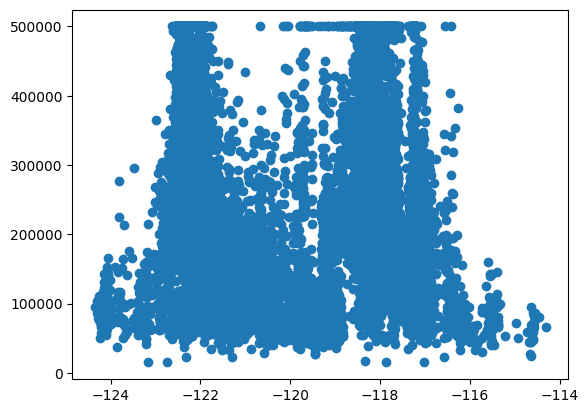

In [5]:
plt.scatter(df['longitude'], house_val)

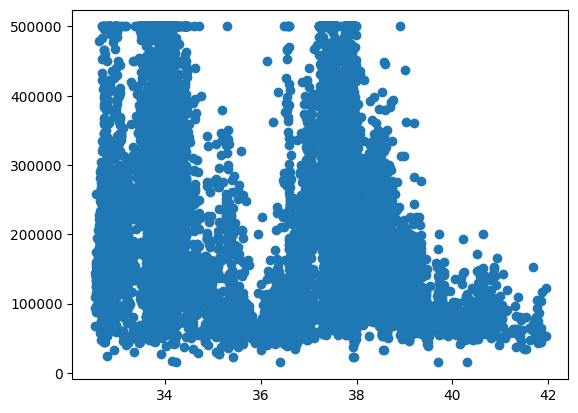

In [6]:
plt.scatter(df['latitude'], house_val)

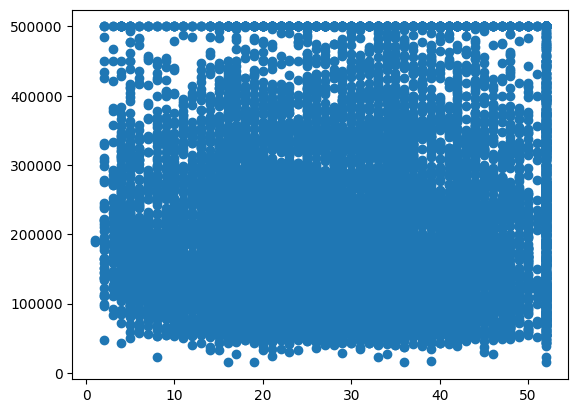

In [7]:
plt.scatter(df['housing_median_age'], house_val)

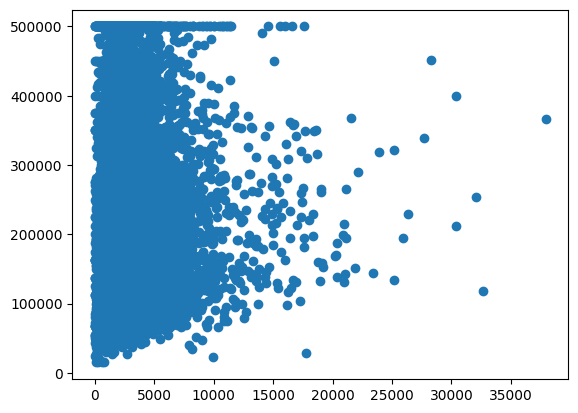

In [8]:
plt.scatter(df['total_rooms'], house_val)

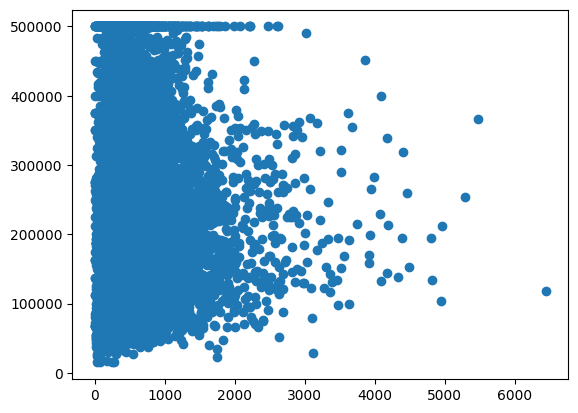

In [9]:
plt.scatter(df['total_bedrooms'], house_val)

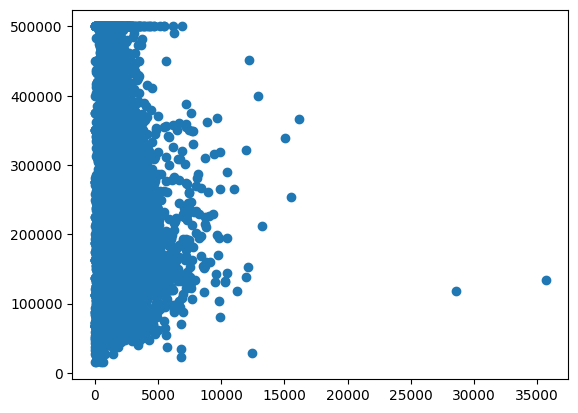

In [10]:
plt.scatter(df['population'], house_val)

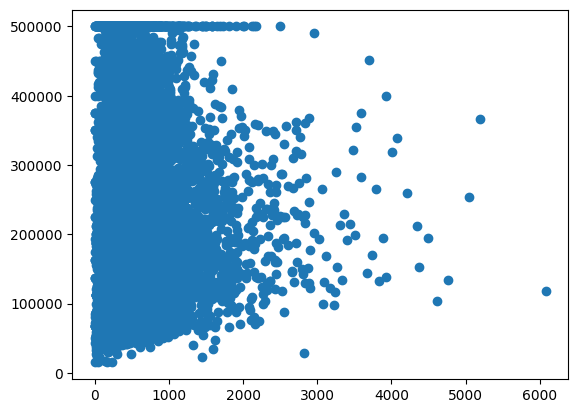

In [11]:
plt.scatter(df['households'], house_val)

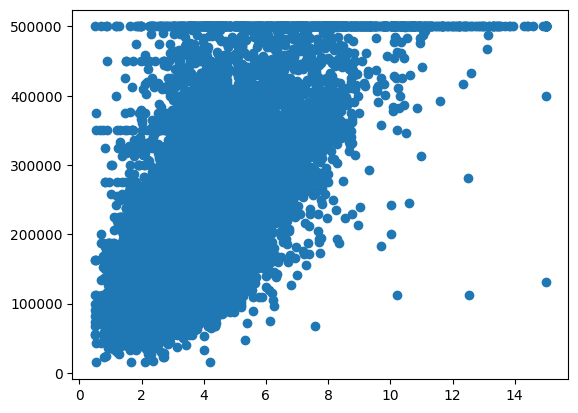

In [12]:
plt.scatter(df['median_income'], house_val)

In [13]:
df_x = df.drop(labels =['median_house_value'], axis = 1)
df_x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_x, house_val)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12750, 8) (4250, 8) (12750,) (4250,)


In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

Text(0, 0.5, 'Predictions')

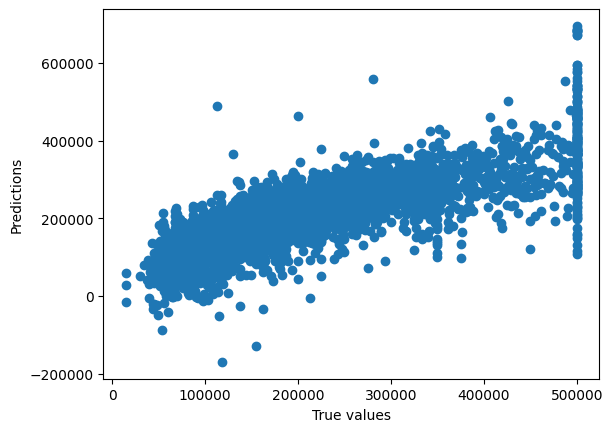

In [17]:
plt.scatter(y_test, prediction)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [18]:
print('The accurcy score is:', lr.score(X_test,y_test))

The accurcy score is: 0.6397692819835186


# Checking the F1 score for this model without 'longitude' feature

In [20]:
df_x_new = df_x.drop(['longitude'], axis = 1)
df_x_new

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...
16995,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


Text(0, 0.5, 'Predictions')

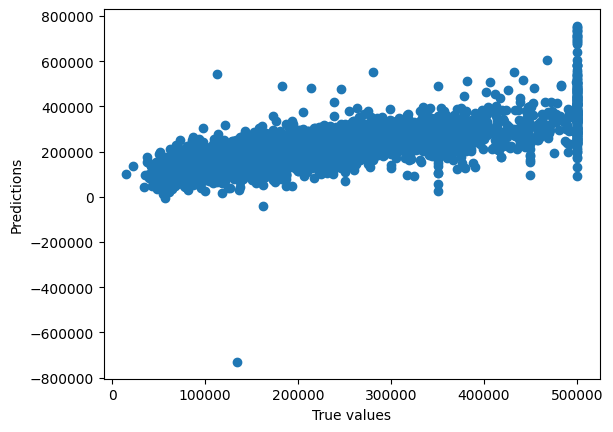

In [21]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(df_x_new, house_val)
lr_n = LinearRegression()
lr_n.fit(Xn_train, yn_train)
predict1 = lr_n.predict(Xn_test)
plt.scatter(yn_test, predict1)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [22]:
print('The accurcy score is:', lr_n.score(Xn_test,yn_test))

The accurcy score is: 0.5676711844086426


# Checking the F1 score for this model without 'latitude' feature

In [23]:
df_x_new = df_x.drop(['latitude'], axis = 1)
df_x_new

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...
16995,-124.26,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,19.0,2672.0,552.0,1298.0,478.0,1.9797


Text(0, 0.5, 'Predictions')

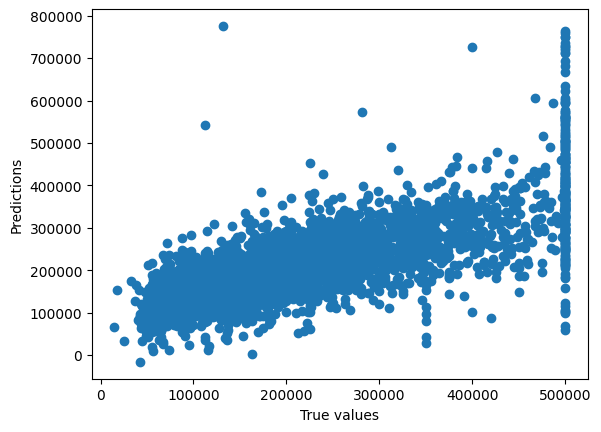

In [24]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(df_x_new, house_val)
lr_n = LinearRegression()
lr_n.fit(Xn_train, yn_train)
predict1 = lr_n.predict(Xn_test)
plt.scatter(yn_test, predict1)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [25]:
print('The accurcy score is:', lr_n.score(Xn_test,yn_test))

The accurcy score is: 0.5611094736063504


# Checking the F1 score for this model without 'housing_median_age' feature

In [26]:
df_x_new = df_x.drop(['housing_median_age'], axis = 1)
df_x_new

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...
16995,-124.26,40.58,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,2672.0,552.0,1298.0,478.0,1.9797


Text(0, 0.5, 'Predictions')

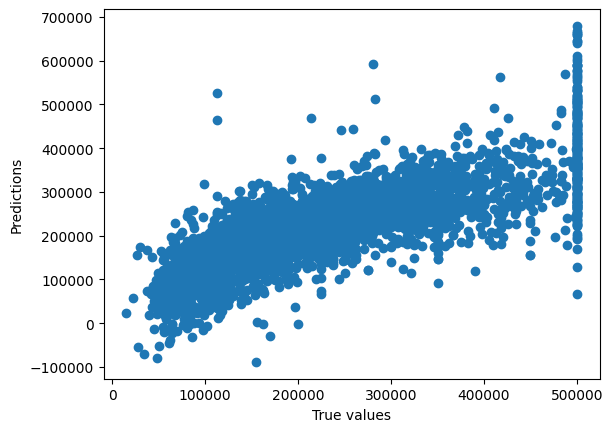

In [27]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(df_x_new, house_val)
lr_n = LinearRegression()
lr_n.fit(Xn_train, yn_train)
predict1 = lr_n.predict(Xn_test)
plt.scatter(yn_test, predict1)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [28]:
print('The accurcy score is:', lr_n.score(Xn_test,yn_test))

The accurcy score is: 0.6373432148522724


# Checking the F1 score for this model without 'total_rooms' feature

In [29]:
df_x_new = df_x.drop(['total_rooms'], axis = 1)
df_x_new

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,552.0,1298.0,478.0,1.9797


Text(0, 0.5, 'Predictions')

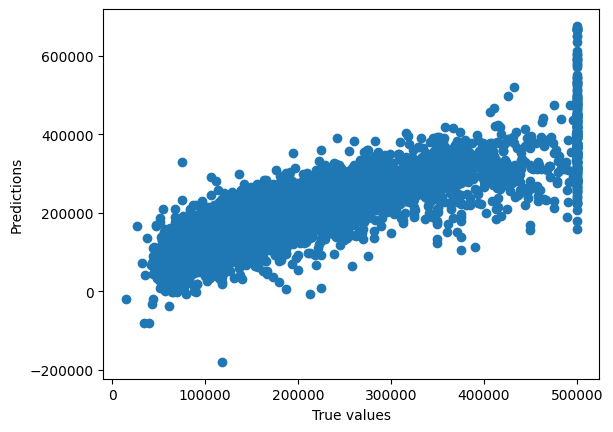

In [30]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(df_x_new, house_val)
lr_n = LinearRegression()
lr_n.fit(Xn_train, yn_train)
predict1 = lr_n.predict(Xn_test)
plt.scatter(yn_test, predict1)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [31]:
print('The accurcy score is:', lr_n.score(Xn_test,yn_test))

The accurcy score is: 0.6697852281530949


# Checking the F1 score for this model without 'total_bedrooms' feature

In [32]:
df_x_new = df_x.drop(['total_bedrooms'], axis = 1)
df_x_new

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,1298.0,478.0,1.9797


Text(0, 0.5, 'Predictions')

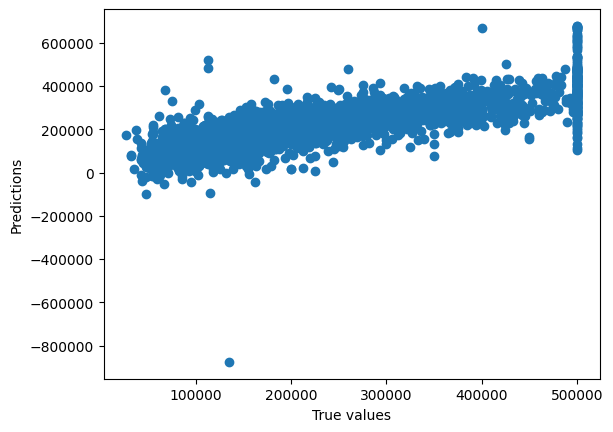

In [33]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(df_x_new, house_val)
lr_n = LinearRegression()
lr_n.fit(Xn_train, yn_train)
predict1 = lr_n.predict(Xn_test)
plt.scatter(yn_test, predict1)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [34]:
print('The accurcy score is:', lr_n.score(Xn_test,yn_test))

The accurcy score is: 0.6245215785460014


# Checking the F1 score for this model without 'population' feature

In [35]:
df_x_new = df_x.drop(['population'], axis = 1)
df_x_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,262.0,1.9250
...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,478.0,1.9797


Text(0, 0.5, 'Predictions')

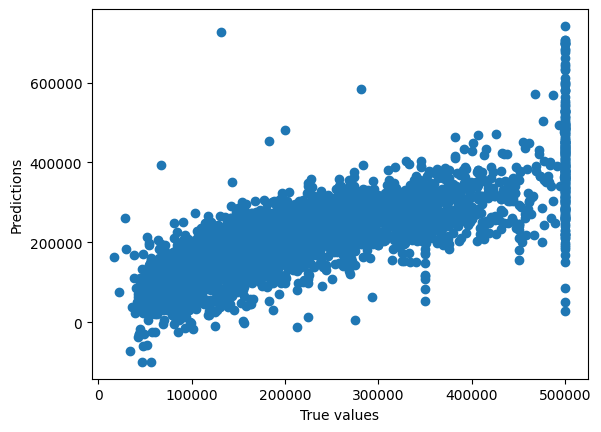

In [36]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(df_x_new, house_val)
lr_n = LinearRegression()
lr_n.fit(Xn_train, yn_train)
predict1 = lr_n.predict(Xn_test)
plt.scatter(yn_test, predict1)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [37]:
print('The accurcy score is:', lr_n.score(Xn_test,yn_test))

The accurcy score is: 0.6218551089689849


# Checking the F1 score for this model without 'households' feature

In [38]:
df_x_new = df_x.drop(['households'], axis = 1)
df_x_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,1.9250
...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,1.9797


Text(0, 0.5, 'Predictions')

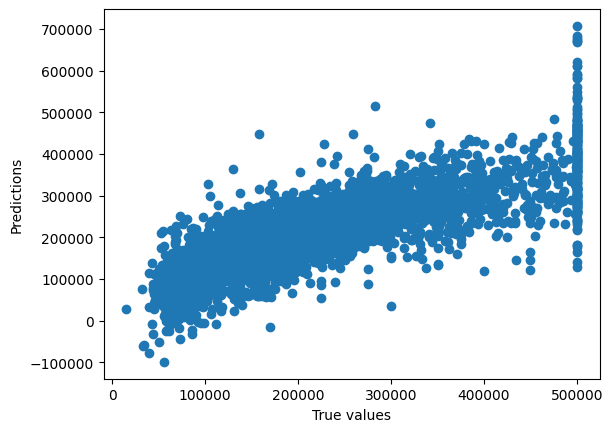

In [39]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(df_x_new, house_val)
lr_n = LinearRegression()
lr_n.fit(Xn_train, yn_train)
predict1 = lr_n.predict(Xn_test)
plt.scatter(yn_test, predict1)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [40]:
print('The accurcy score is:', lr_n.score(Xn_test,yn_test))

The accurcy score is: 0.6480155290931303


# Checking the F1 score for this model without 'median_income' feature

In [41]:
df_x_new = df_x.drop(['median_income'], axis = 1)
df_x_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0
...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0


Text(0, 0.5, 'Predictions')

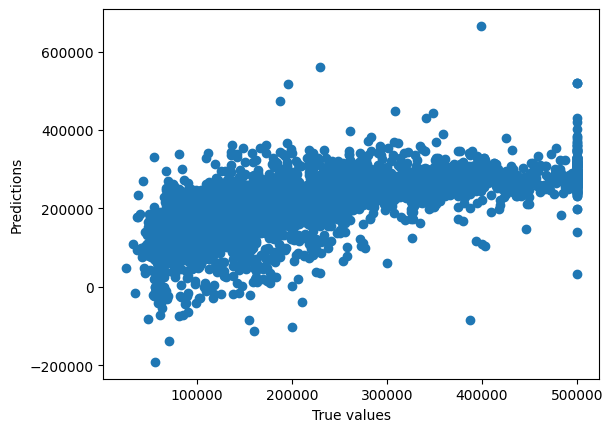

In [42]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(df_x_new, house_val)
lr_n = LinearRegression()
lr_n.fit(Xn_train, yn_train)
predict1 = lr_n.predict(Xn_test)
plt.scatter(yn_test, predict1)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [43]:
print('The accurcy score is:', lr_n.score(Xn_test,yn_test))

The accurcy score is: 0.3912299354956672
